<a href="https://colab.research.google.com/github/ChristalL99/ECON211_DecisionTree/blob/main/Economy_HappinessScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Set environment and import toolboxes
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# Step 1: Data Preprocessing

In [16]:
# read in the data file and show the columns
df=pd.read_csv("https://raw.githubusercontent.com/ChristalL99/ECON211_DecisionTree/main/data.csv")
df

,Economy (GDP per Capita),Happiness Score
0,1.39651,7.587
1,1.30232,7.561
2,1.32548,7.527
3,1.45900,7.522
4,1.32629,7.427
...,...,...
777,0.35900,3.334
778,0.47600,3.231
779,0.35000,3.203
780,0.02600,3.083


In [91]:
# Split "Happiness Score" into 3 classes ("Low", "Average", "High")

# Define as follows:
# Happiness Score < 4.3: Low
# Happiness Score < 6.3: High
# Otherwise: Average

df["Happiness Score Classes"]=df["Happiness Score"].apply(lambda x: 'High' if x>6.5 else 'Low' if x<4.3 else 'Average')
df

,Economy (GDP per Capita),Happiness Score,Happiness Score Classes
0,1.39651,7.587,High
1,1.30232,7.561,High
2,1.32548,7.527,High
3,1.45900,7.522,High
4,1.32629,7.427,High
...,...,...,...
777,0.35900,3.334,Low
778,0.47600,3.231,Low
779,0.35000,3.203,Low
780,0.02600,3.083,Low


# Step 2: Build Decision Tree

In [92]:
# Identify the feature and the target variable
feature_names=["Economy (GDP per Capita)"]
features=df[feature_names]
targets=df["Happiness Score Classes"]
targets_names = targets.unique()

In [93]:
# Split training and test dataset by 8:2
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2, random_state=42, shuffle=True)

In [98]:
#####Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(train_features,train_targets)

# Predict the response for test dataset
y_pred = clf.predict(test_features)

# Compute test set accuracy 
acc = accuracy_score(y_pred, test_targets)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.69


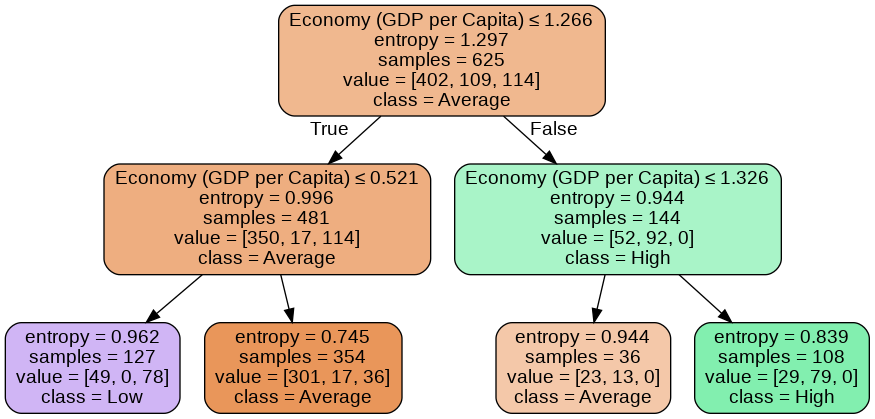

In [100]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_names, 
                class_names=clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTree_Graph.png')
Image(graph.create_png())